In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle

In [2]:
import os
dircs=os.listdir('/kaggle/input/Fishdiseasedataset/combine/FishDisease')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))

total labels of images 1382
total images 1382


In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42, 
                                                  shuffle=True, test_size=0.20)

In [11]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [12]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import itertools

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
resnet = ResNet50(weights='imagenet',
                      input_shape= (224,224,3),
                      pooling='avg',
                      include_top= False)  


#show the base model summary 

#show how manay layers in the Resnet Network
layers = resnet.layers
print(f'Number of Layers: {len(layers)} ')
for layer in layers[113:175]:
    layer.trainable = False
for layer in layers:
    print(layer, layer.trainable)

2022-12-22 18:43:17.472238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 18:43:17.473673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 18:43:17.746986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 18:43:17.748180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 18:43:17.749268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 1s 0us/step
Number of Layers: 176 
<keras.engine.input_layer.InputLayer object at 0x7f5a5547c750> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5997895a50> True
<keras.layers.convolutional.Conv2D object at 0x7f59976cd6d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5996fc9610> True
<keras.layers.core.Activation object at 0x7f599746cfd0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f599746c950> True
<keras.layers.pooling.MaxPooling2D object at 0x7f5997474810> True
<keras.layers.convolutional.Conv2D object at 0x7f599761e310> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5997623a90> True
<keras.layers.core.Activation object at 0x7f599761e7d0> True
<keras.layers.convolutional.Conv2D object at 0x7f599c4d2c90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5997635c50> True
<keras.layers.core

In [14]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import  GlobalAveragePooling2D

In [29]:
model = Sequential()

model.add(resnet)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add( BatchNormalization())

model.add(Dense(4, activation='softmax'))


In [31]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
 rotation_range=30,
 featurewise_center=True,   
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,

 fill_mode="nearest")

In [32]:
test_datagen=ImageDataGenerator()

In [33]:
train_generator=train_datagen.flow(X_train_norm, train_y,batch_size=20)

In [34]:
validation_generator=test_datagen.flow(X_test_norm, test_y,batch_size=20)

In [35]:
from keras.callbacks import EarlyStopping
import tensorflow

model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(0.00001),
              metrics=['acc'])
 
# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(
      train_generator,
      steps_per_epoch=
     train_generator.n/train_generator.batch_size,
    epochs=30,
      validation_data=validation_generator, 
    validation_steps=validation_generator.n/validation_generator.batch_size,
    callbacks=[es],
      verbose=1)

Epoch 1/30
55/55 [==============================] - 22s 309ms/step - loss: 1.0236 - acc: 0.6009 - val_loss: 1.5272 - val_acc: 0.2094
Epoch 2/30
55/55 [==============================] - 17s 311ms/step - loss: 0.4408 - acc: 0.8380 - val_loss: 1.4263 - val_acc: 0.3646
Epoch 3/30
55/55 [==============================] - 16s 293ms/step - loss: 0.2588 - acc: 0.9186 - val_loss: 1.3705 - val_acc: 0.4621
Epoch 4/30
55/55 [==============================] - 17s 311ms/step - loss: 0.1825 - acc: 0.9520 - val_loss: 1.3131 - val_acc: 0.5271
Epoch 5/30
55/55 [==============================] - 17s 297ms/step - loss: 0.1463 - acc: 0.9538 - val_loss: 1.2385 - val_acc: 0.5848
Epoch 6/30
55/55 [==============================] - 17s 314ms/step - loss: 0.1237 - acc: 0.9602 - val_loss: 1.1958 - val_acc: 0.6029
Epoch 7/30
55/55 [==============================] - 16s 296ms/step - loss: 0.1128 - acc: 0.9638 - val_loss: 1.0832 - val_acc: 0.6715
Epoch 8/30
55/55 [==============================] - 17s 307ms/step - 

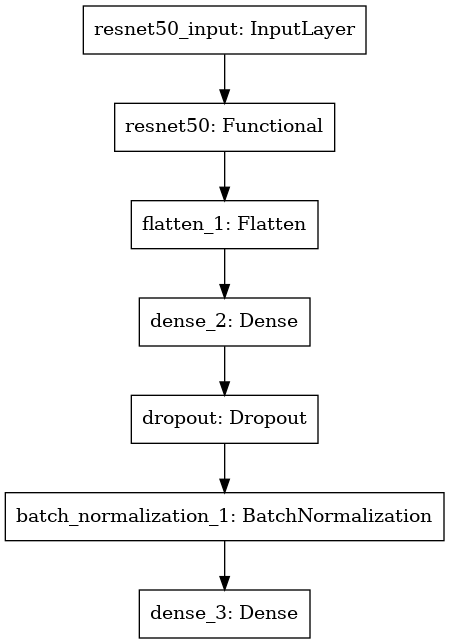

In [37]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [38]:
model.evaluate(validation_generator,batch_size=20)

14/14 [==============================] - 1s 76ms/step - loss: 0.0243 - acc: 0.9928


[0.024298639968037605, 0.9927797913551331]

Confusion Matrix
[[59  1  0  0]
 [ 1 84  0  0]
 [ 0  0 76  0]
 [ 0  0  0 56]]
['Black Spot', 'Fresh Fish', 'Red Spot', 'White Spot']


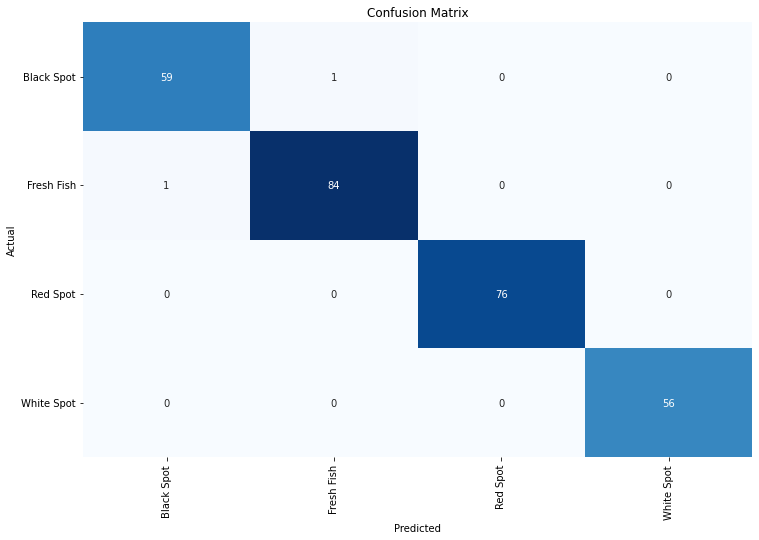

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(X_test_norm),axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  Black Spot     0.9833    0.9833    0.9833        60
  Fresh Fish     0.9882    0.9882    0.9882        85
    Red Spot     1.0000    1.0000    1.0000        76
  White Spot     1.0000    1.0000    1.0000        56

    accuracy                         0.9928       277
   macro avg     0.9929    0.9929    0.9929       277
weighted avg     0.9928    0.9928    0.9928       277



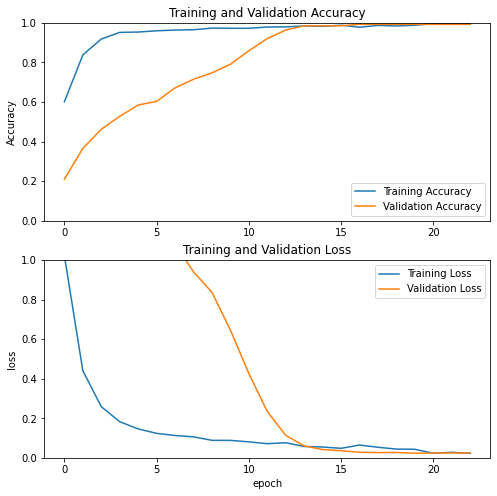

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()